# Preprocessing Numpy Files

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

## Load numpy files

In [3]:
# read all numpy files from new_sample folder

folder_path = 'new_sample'
files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
data = []
for file in files:
    file_path = os.path.join(folder_path, file)
    data.append(np.load(file_path))


## Find the maximum height and width directly

In [27]:
# Find the maximum height and width directly
max_height = max(d.shape[0] for d in data)
max_width = max(d.shape[1] for d in data)

# Ensure they are at least the max found values and a multiple of 8
max_height = ((max_height + 7) // 8) * 8  
max_width = ((max_width + 7) // 8) * 8  

print(max_height, max_width)


88 232


## Add padding to all images 

I added padding instead of rescaling the image to maintain the original size, as it could impact downstream tasks.



In [29]:
# add padding to all images to make them of same size
padded_data = [
    np.pad(
        d, 
        (((max_height - d.shape[0]) // 2, (max_height - d.shape[0] + 1) // 2), 
         ((max_width - d.shape[1]) // 2, (max_width - d.shape[1] + 1) // 2)), 
        mode='constant', constant_values=0
    ) 
    for d in tqdm(data, desc="Padding images")
]

Padding images: 100%|██████████| 1290/1290 [00:00<00:00, 28363.81it/s]


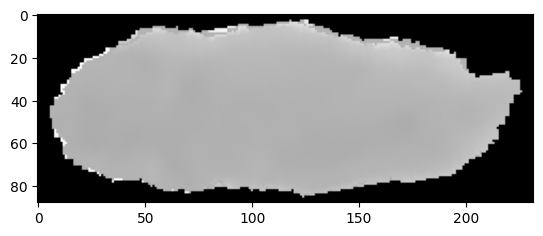

In [30]:
# plot one of the images

plt.imshow(padded_data[0], cmap='gray')
plt.show()

## Split the dataset into training, validation, and test sets.

In [25]:
# Set random seed for reproducibility
np.random.seed(0)

# Shuffle data
np.random.shuffle(padded_data)

# Split dataset 80-10-10
train_size = int(0.8 * len(padded_data))
val_size = int(0.1 * len(padded_data))

train_data = padded_data[:train_size]
val_data = padded_data[train_size:train_size + val_size]
test_data = padded_data[train_size + val_size:]  # Avoids redundant calculations

# Define base directory and subdirectories
base_dir = 'processed_data'
subdirs = ['train', 'val', 'test']

# Create necessary directories
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)

# Helper function to save data
def save_numpy_files(data, folder):
    path = os.path.join(base_dir, folder)
    for i, d in enumerate(data):
        np.save(os.path.join(path, f"{i}.npy"), d)

# Save datasets
save_numpy_files(train_data, 'train')
save_numpy_files(val_data, 'val')
save_numpy_files(test_data, 'test')

print("Data saved successfully!")




Data saved successfully!
